In [3]:
''' This workbook will cover the concept and execution of KNN Imputation.
Using the k-nearest-neighbor algorithm to impute missing values has proven to generally effective.
'''
from numpy import mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [3]:
# Load and review the data
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    #print(n_miss)
    perc = n_miss / dataframe.shape[0] * 100
    print(f'Row {i}: {float(round(perc, 2))}%')
    

Row 0: 0.33%
Row 1: 0.0%
Row 2: 0.0%
Row 3: 20.0%
Row 4: 8.0%
Row 5: 19.33%
Row 6: 18.67%
Row 7: 23.0%
Row 8: 15.67%
Row 9: 10.67%
Row 10: 18.33%
Row 11: 14.67%
Row 12: 18.67%
Row 13: 34.67%
Row 14: 35.33%
Row 15: 82.33%
Row 16: 34.0%
Row 17: 39.33%
Row 18: 9.67%
Row 19: 11.0%
Row 20: 55.0%
Row 21: 66.0%
Row 22: 0.33%
Row 23: 0.0%
Row 24: 0.0%
Row 25: 0.0%
Row 26: 0.0%
Row 27: 0.0%


In [5]:
''' Our first step is to define a general model of the process, much like what is outlined in the SimpleImputer Notebook.'''
# read in data
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create pipeline
pipeline = Pipeline(steps=[('i', KNNImputer()), ('m', RandomForestClassifier())])

# evaluate
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'{mean(scores)}, {std(scores)}')

''' In this example we have not defined our hyperparameter for the KNN algorithm, n_neighbors, 
below we will go further in depth with that'''

0.8688888888888887, 0.055733049795486454


N_Neighbors (1): 0.8577777777777779, 0.05230489909306585
N_Neighbors (3): 0.8633333333333333, 0.046626967240793966
N_Neighbors (5): 0.8577777777777776, 0.05013561854523766
N_Neighbors (7): 0.8655555555555555, 0.0505402907357518
N_Neighbors (9): 0.857777777777778, 0.05704665623552637
N_Neighbors (11): 0.861111111111111, 0.05516529594358404
N_Neighbors (13): 0.8622222222222221, 0.051448164012400995
N_Neighbors (15): 0.8633333333333334, 0.056009258493904694
N_Neighbors (17): 0.8666666666666666, 0.059628479399994376
N_Neighbors (19): 0.8622222222222223, 0.06130272988503875
N_Neighbors (21): 0.8588888888888888, 0.057531526515553856


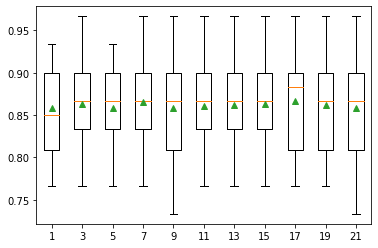

In [6]:
''' Here we will repeat the process above, but iterate over some values to find the best option for the hyperparameter 
n_neighbors for the imputing model. '''

# read in data
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create strategies, in this case odd numbers between 1-21
results = list()
strategies = [i for i in [1,3,5,7,9,11,13,15,17,19,21]]

for s in strategies:
# create pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=s)), ('m', RandomForestClassifier())])

    # evaluate
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'N_Neighbors ({s}): {mean(scores)}, {std(scores)}')
    
    # append results
    results.append(scores)

pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()
''' In this case it appears that there is no substantial difference in the choice of the parameter. '''